In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
from numba import jit,prange
%run ../prop/propagators_1d.py

In [2]:
'''
Exact propagation in 1D. 
'''
@jit(nopython=True, parallel=True)
def exact_prop_numba(in_wave,out_wave,L_in,L_out,wavel,z):
    pi = 3.14159265359
    N_in  = in_wave.shape[0]
    N_out = out_wave.shape[0]
    in_domain  = np.linspace(-L_in/2,L_in/2,N_in)
    out_domain = np.linspace(-L_out/2,L_out/2,N_out)
    step_in = L_in/N_in
    for i in prange(N_out):
        for j in range(N_in):
            x = in_domain[j]
            f = in_wave[j]
            x1 = out_domain[i]
            out_wave[i] += f*np.exp((-1j*pi*x*x)/(wavel*z))*np.exp((-1j*2*pi*x*x1)/(wavel*z))
            #out_wave[i] += ne.evaluate('f*exp((-1j*pi*x*x)/(wavel*z))*exp((-1j*2*pi*x*x1)/(wavel*z))')
    out_wave *= (1/np.sqrt(1j*wavel*z))*step_in
    return



In [3]:
wavel = 0.5*10**(-6)
pi = np.pi
z = 100
N = 1000
L_in  = 5e-1

in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1

sampling = in_domain_exact[1] - in_domain_exact[0]
critical = (wavel*z/L_in)
if sampling>critical:
    print('Use TF')
else :
    print('Use IR')
print('Fresnel Number :', (L_in**2)/(wavel*z))

Use TF
Fresnel Number : 5000.0


In [4]:
out_,L_ = propIR(in_wave,L_in/N,L_in,wavel,z)
out_domain_ = np.linspace(-L_/2,L_/2,N)

In [5]:
N = 5000
in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave_exact = np.zeros((N),dtype='complex128')
out_domain_exact  = np.linspace(-L_/2,L_/2,N)

exact_prop_numba(in_wave,out_wave_exact,L_in,L_,wavel,z)

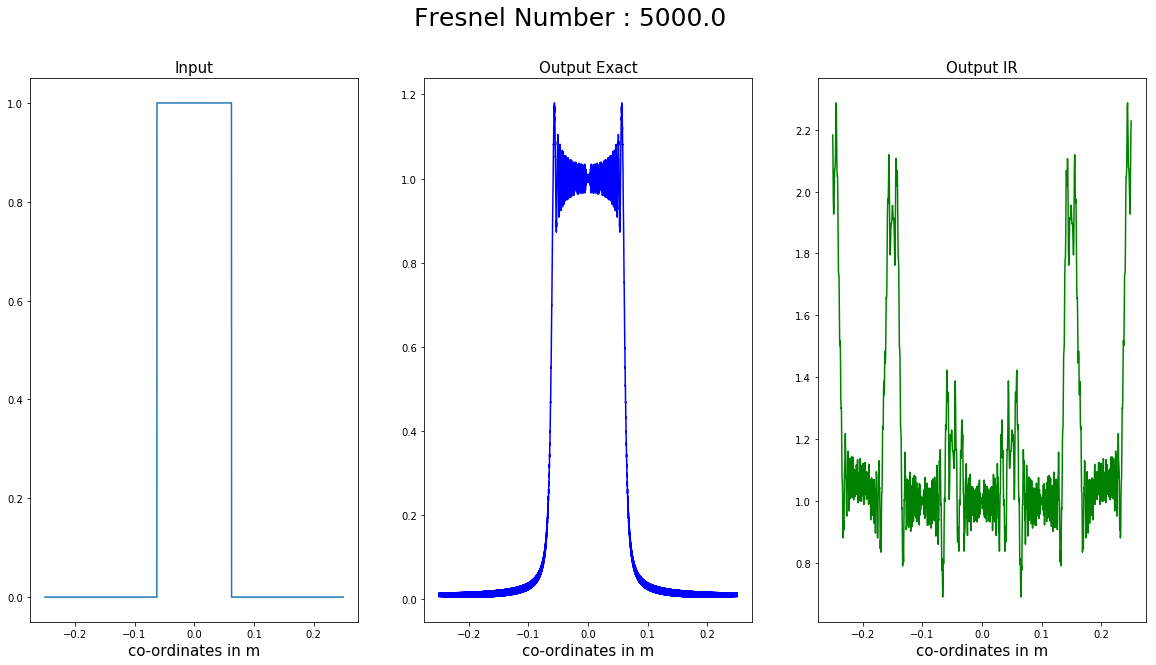

In [6]:
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(in_domain_exact,np.abs(in_wave))
ax1.set_xlabel('co-ordinates in m',fontsize = 15)
ax1.set_title('Input', fontsize = 15)
ax2.plot(out_domain_exact,np.abs(out_wave_exact),'b')
ax2.set_xlabel('co-ordinates in m',fontsize = 15)
ax2.set_title('Output Exact', fontsize = 15)
ax3.plot(out_domain_,np.abs(out_),'g')
ax3.set_xlabel('co-ordinates in m',fontsize = 15)
ax3.set_title('Output IR', fontsize = 15)
f.set_size_inches(20, 10, forward=True)
f.suptitle('Fresnel Number : '+str((L_in**2)/(wavel*z)),fontsize = 25)
plt.show()

In [7]:
%timeit exact_prop_numba(in_wave,out_wave_exact,L_in,L_,wavel,z)

381 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
